In [0]:
!pip install scikit-plot

In [0]:
import random
import numpy as np
import torch
import torchvision
from  torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from  torchvision import datasets, transforms
from torchsummary import summary
import os
import skimage

In [0]:
import re
import string
import pandas as pd
import matplotlib.pyplot as plt
import scikitplot.plotters as skplt
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
from gensim import utils
from nltk.corpus import stopwords

In [0]:
import warnings
warnings.filterwarnings("ignore")

In [0]:
def plot_cmat(yte, ypred):
    '''Plotting confusion matrix'''
    skplt.plot_confusion_matrix(yte,ypred,normalize=True)
    plt.show()

In [0]:
class nn_Fake_News(nn.Module):
  def __init__(self):
    super(nn_Fake_News, self).__init__()
    # self.nn_forward = nn.Sequential(
    #     #nn.Embedding(200, 60),

    #     #nn.Sigmoid()
    # )
    self.lstm = nn.LSTM(300, 60, 1)
    self.drop = nn.Dropout(0.5)
    self.nn_linear1 = nn.Linear(60, 60)
    self.relu = nn.ReLU()
    self.nn_linear2 = nn.Linear(60, 2)
    #self.output = nn.Sigmoid()

  def forward(self, input):
    x, _ = self.lstm(input)
    x = self.drop(x)
    x = self.nn_linear1(x)
    x = self.relu(x)
    x = self.drop(x)
    x = self.nn_linear2(x)    
    return x

In [0]:
xtr = np.load('./xtr.npy')
xte = np.load('./xte.npy')
ytr = np.load('./ytr.npy')
yte = np.load('./yte.npy')

tr_label = np.zeros((xtr.shape[0], 2), dtype=float)
for i in range(xtr.shape[0]):
  if ytr[i] == 1:
    tr_label[i, :] = [0.0, 1.0]
  else:
    tr_label[i, :] = [1.0, 0.0]
tr_label = torch.from_numpy(tr_label).double().cuda()


In [0]:
nn_FN = nn_Fake_News().double().cuda()
optimizer = optim.SGD(nn_FN.parameters(), lr=0.01, momentum=0.9)

loss_function = nn.BCEWithLogitsLoss()

for epoch in range(10000):  
  y_pred = nn_FN(torch.from_numpy(xtr.reshape(-1, xtr.shape[0], xtr.shape[1])).double().cuda())

  optimizer.zero_grad()
  loss = loss_function(y_pred.view(xtr.shape[0], 2), tr_label.detach())
  
  loss.backward()
  optimizer.step()        

  #print("Loss = %.5f" % loss.item()) 
  if (epoch%100==0):
    print("Epoch %d" % epoch)
    print("Loss = %.5f" % loss.item()) 
    torch.save(nn_FN, 'nn_Fake_News.pkl')

print('Finished Training')

Epoch 0
Loss = 0.69542
Epoch 100
Loss = 0.69001
Epoch 200
Loss = 0.68128
Epoch 300
Loss = 0.64969
Epoch 400
Loss = 0.53553
Epoch 500
Loss = 0.38088
Epoch 600
Loss = 0.30647
Epoch 700
Loss = 0.27612
Epoch 800
Loss = 0.25380
Epoch 900
Loss = 0.24044
Epoch 1000
Loss = 0.22874
Epoch 1100
Loss = 0.22495
Epoch 1200
Loss = 0.21782
Epoch 1300
Loss = 0.20851
Epoch 1400
Loss = 0.20695
Epoch 1500
Loss = 0.20464
Epoch 1600
Loss = 0.19616
Epoch 1700
Loss = 0.19442
Epoch 1800
Loss = 0.19291
Epoch 1900
Loss = 0.19064
Epoch 2000
Loss = 0.19042
Epoch 2100
Loss = 0.18542
Epoch 2200
Loss = 0.18202
Epoch 2300
Loss = 0.18107
Epoch 2400
Loss = 0.18452
Epoch 2500
Loss = 0.17844
Epoch 2600
Loss = 0.17741
Epoch 2700
Loss = 0.17563
Epoch 2800
Loss = 0.17606
Epoch 2900
Loss = 0.17581
Epoch 3000
Loss = 0.17190
Epoch 3100
Loss = 0.17464
Epoch 3200
Loss = 0.17297
Epoch 3300
Loss = 0.16906
Epoch 3400
Loss = 0.16977
Epoch 3500
Loss = 0.16843
Epoch 3600
Loss = 0.16753
Epoch 3700
Loss = 0.16656
Epoch 3800
Loss = 0.1652

Accuracy = 93.93%


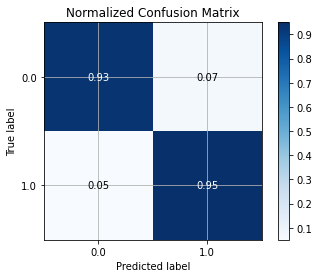

In [0]:
y_pred_raw = nn_FN(torch.from_numpy(xte.reshape(-1, xte.shape[0], xte.shape[1])).cuda())
y_pred = np.zeros(y_pred_raw.shape[1])
for i in range(y_pred_raw.shape[1]):
    if y_pred_raw[0, i, 1] > y_pred_raw[0, i, 0]:
      y_pred[i] = 1
    else:
      y_pred[i] = 0

m = yte.shape[0]
n = (yte != y_pred).sum()
print("Accuracy = " + format((m-n)/m*100, '.2f') + "%")   # 72.94%

# Draw the confusion matrix
plot_cmat(yte, y_pred)